Three Observable Trends Based On the Data:

1. Based on the scatter plot data for both hemispheres when comparing max temperature vs latitude, it's clear that for the Northern Hemisphere , colder temperatures occur as a result of a movement towards higher positive latitudes. On the contrary, for the Southern Hemisphere, as you approach zero degree latitude, that is when the temperature is at the max.

2. For the wind speed vs latitude relationship on both hemispheres, although differnt line equations, wind speed is pretty constant for the Northern Hemisphere, but is a negative relationship for the souther hemisphere where wind speed decreases as you approach a more positive latitude. 

3. Based on the cloudiness percentage for both hemispheres, it was interesting to see that both hemispheres have a positive relationship where cloudiness increases as you approach a more positive latitude

In [40]:
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os
import matplotlib.pyplot as plt
from datetime import datetime

# Import API key
from config import api_key_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [41]:
lat_lngs = []
cities = []

test_cities = ["Nashville", "Los Angeles", "Chicago"]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [42]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key_weather}&units={units}&q="

In [43]:
lat = []
lng = []
city_names = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
responses = []

print("Beginning Data Retrieval")
print("------------------------")
record_count = 1
set_count = 1



#for city in test_cities:
for i, city in enumerate (cities, start = 1):   
   
    #responses.append(response)
    try:
        response = requests.get(query_url + city).json()
        #print(json.dumps(response, indent=4, sort_keys=True))
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        city_names.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if record_count > 49:
            record_count = 1
            set_count = set_count + 1
    
        else:
            record_count = record_count + 1
            
        print(f"Processing Record {record_count} of Set {set_count} : {city}") 
  
    except:
        print("City not found!")
        #pass
    



Beginning Data Retrieval
------------------------
Processing Record 2 of Set 1 : bluff
City not found!
Processing Record 3 of Set 1 : hobart
Processing Record 4 of Set 1 : sioux lookout
Processing Record 5 of Set 1 : mataura
Processing Record 6 of Set 1 : new norfolk
City not found!
Processing Record 7 of Set 1 : upernavik
Processing Record 8 of Set 1 : gat
Processing Record 9 of Set 1 : westport
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : ushuaia
Processing Record 12 of Set 1 : kavaratti
Processing Record 13 of Set 1 : salinopolis
Processing Record 14 of Set 1 : hithadhoo
Processing Record 15 of Set 1 : necochea
Processing Record 16 of Set 1 : hermanus
Processing Record 17 of Set 1 : norman wells
City not found!
Processing Record 18 of Set 1 : manyoni
Processing Record 19 of Set 1 : skibbereen
Processing Record 20 of Set 1 : east london
Processing Record 21 of Set 1 : busselton
Processing Record 22 of Set 1 : bukachacha
Processing Record 23 of Set 1 : 

City not found!
Processing Record 43 of Set 4 : lagoa
Processing Record 44 of Set 4 : mar del plata
Processing Record 45 of Set 4 : lavrentiya
Processing Record 46 of Set 4 : zaysan
Processing Record 47 of Set 4 : nikolskoye
Processing Record 48 of Set 4 : guerrero negro
Processing Record 49 of Set 4 : oksbol
Processing Record 50 of Set 4 : bambous virieux
Processing Record 1 of Set 5 : kilindoni
Processing Record 2 of Set 5 : olinda
Processing Record 3 of Set 5 : zhigansk
Processing Record 4 of Set 5 : nara
Processing Record 5 of Set 5 : avera
Processing Record 6 of Set 5 : reshetylivka
Processing Record 7 of Set 5 : brae
Processing Record 8 of Set 5 : omsukchan
Processing Record 9 of Set 5 : sinnamary
Processing Record 10 of Set 5 : ponta delgada
Processing Record 11 of Set 5 : hualmay
Processing Record 12 of Set 5 : uray
Processing Record 13 of Set 5 : breytovo
Processing Record 14 of Set 5 : ancud
Processing Record 15 of Set 5 : warri
Processing Record 16 of Set 5 : vila franca do 

Processing Record 40 of Set 8 : port blair
Processing Record 41 of Set 8 : arlit
Processing Record 42 of Set 8 : caravelas
Processing Record 43 of Set 8 : san jeronimito
Processing Record 44 of Set 8 : kaitangata
Processing Record 45 of Set 8 : vrangel
Processing Record 46 of Set 8 : lazaro cardenas
Processing Record 47 of Set 8 : ajdabiya
Processing Record 48 of Set 8 : okakarara
Processing Record 49 of Set 8 : owando
Processing Record 50 of Set 8 : aklavik
Processing Record 1 of Set 9 : kortkeros
Processing Record 2 of Set 9 : jumla
Processing Record 3 of Set 9 : aksha
Processing Record 4 of Set 9 : paldiski
Processing Record 5 of Set 9 : nyborg
Processing Record 6 of Set 9 : moree
Processing Record 7 of Set 9 : coahuayana
Processing Record 8 of Set 9 : juneau
Processing Record 9 of Set 9 : ilongero
City not found!
City not found!
Processing Record 10 of Set 9 : katherine
Processing Record 11 of Set 9 : bogande
Processing Record 12 of Set 9 : chinchani
Processing Record 13 of Set 9 :

In [44]:
weather_dict = {
    "city": city_names,
    "lat": lat,
    "long": lng,
    "max temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness, 
    "wind speed": wind_speed,
    "country": country, 
    "date": date    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
#weather_data.max()

,city,lat,long,max temp,humidity,cloudiness,wind speed,country,date
0,Bluff,-46.6000,168.3333,58.69,73,60,5.59,NZ,1609884688
1,Hobart,-42.8794,147.3294,64.99,55,40,14.99,AU,1609884644
2,Sioux Lookout,50.1001,-91.9170,23.00,85,90,3.36,CA,1609884688
3,Mataura,-46.1927,168.8643,65.61,59,63,4.00,NZ,1609884688
4,New Norfolk,-42.7826,147.0587,64.99,58,59,3.00,AU,1609884688


In [36]:
#weather_data['date'] = pd.to_datetime(weather_data['date'] ,unit='s')
#weather_data

In [45]:
cities_output_file = os.path.join('..','output_data', 'cities.csv')
#  Open the output file
with open(output_data_file, 'w') as datafile:
    weather_data.to_csv(output_data_file)

In [49]:
timestamp = weather_data.iloc[0,8]
timestamp = datetime.fromtimestamp(timestamp).strftime('%m-%d-%y')

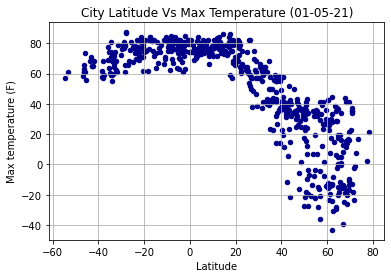

In [51]:

weather_data.plot(kind='scatter', x='lat', y='max temp', c='DarkBlue')
plt.title(f'City Latitude Vs Max Temperature ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsMaxTemperature.png")

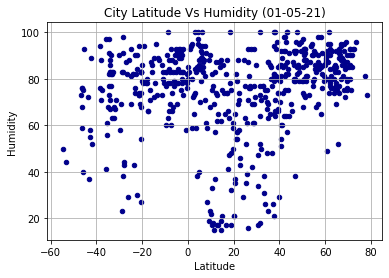

In [52]:
weather_data.plot(kind='scatter', x='lat', y='humidity', c='DarkBlue')
plt.title(f'City Latitude Vs Humidity ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("../Images/LatitudeVsHumidity.png")

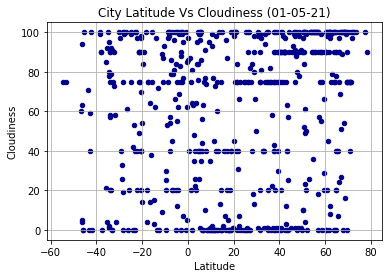

In [53]:
weather_data.plot(kind='scatter', x='lat', y='cloudiness', c='DarkBlue')
plt.title(f'City Latitude Vs Cloudiness ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")

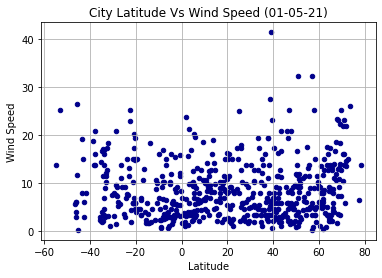

In [54]:
weather_data.plot(kind='scatter', x='lat', y='wind speed', c='DarkBlue')
plt.title(f'City Latitude Vs Wind Speed ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("../Images/LatitudeVsWindSpeed.png")

In [55]:
northern_hemisphere_data = weather_data[weather_data["lat"] > 0]
southern_hemisphere_data = weather_data[weather_data["lat"] < 0]

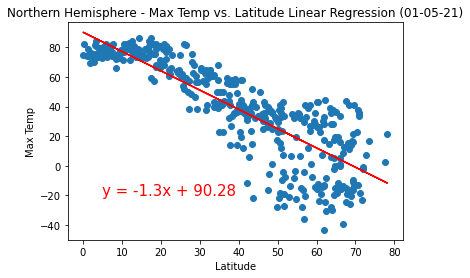

<Figure size 432x288 with 0 Axes>

In [56]:
x_values = northern_hemisphere_data['lat']
y_values = northern_hemisphere_data['max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({timestamp})')
plt.show()
plt.savefig("../Images/NHLatitudeVsMaxTemperature.png")

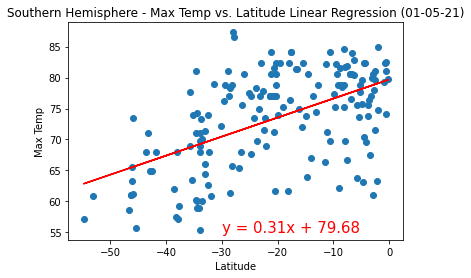

<Figure size 432x288 with 0 Axes>

In [57]:
x_values = southern_hemisphere_data['lat']
y_values = southern_hemisphere_data['max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({timestamp})')
plt.show()
plt.savefig("../Images/SHLatitudeVsMaxTemp.png")

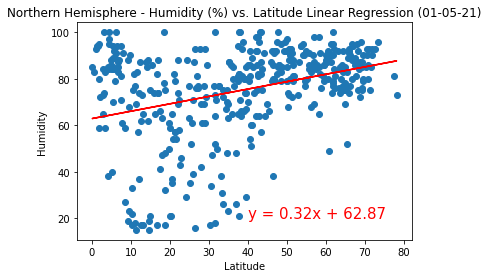

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = northern_hemisphere_data['lat']
y_values = northern_hemisphere_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({timestamp})')
plt.show()
plt.savefig("../Images/NHLatitudeVsHumidity.png")

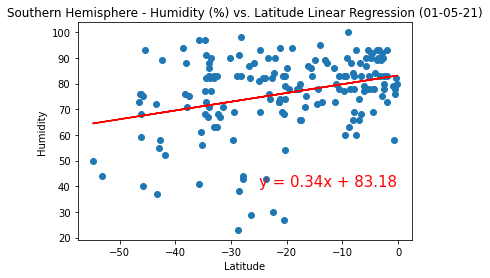

<Figure size 432x288 with 0 Axes>

In [59]:
x_values = southern_hemisphere_data['lat']
y_values = southern_hemisphere_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({timestamp})')
plt.show()
plt.savefig("../Images/SHLatitudeVsHumidity.png")

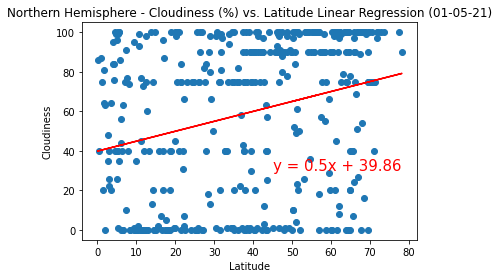

<Figure size 432x288 with 0 Axes>

In [60]:
x_values = northern_hemisphere_data['lat']
y_values = northern_hemisphere_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({timestamp})')
plt.show()
plt.savefig("../Images/NHLatitudeVsCloudiness.png")

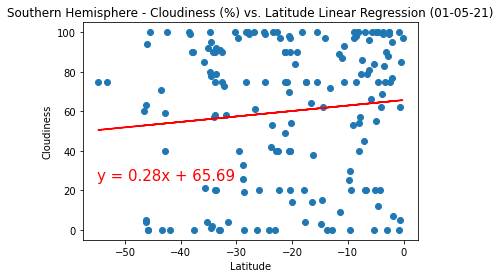

<Figure size 432x288 with 0 Axes>

In [61]:
x_values = southern_hemisphere_data['lat']
y_values = southern_hemisphere_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({timestamp})')
plt.show()
plt.savefig("../Images/SHLatitudeVsCloudiness.png")

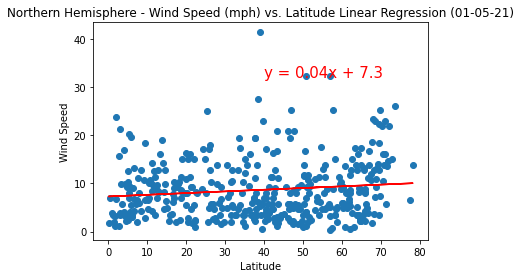

<Figure size 432x288 with 0 Axes>

In [62]:
x_values = northern_hemisphere_data['lat']
y_values = northern_hemisphere_data['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,32),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({timestamp})')
plt.show()
plt.savefig("../Images/NHLatitudeVsWindSpeed.png")

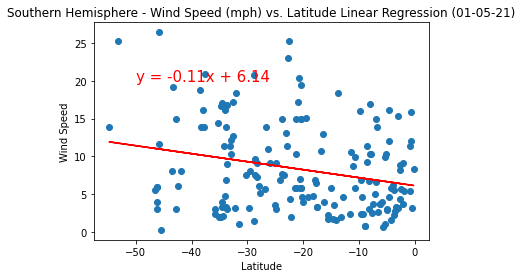

<Figure size 432x288 with 0 Axes>

In [63]:
x_values = southern_hemisphere_data['lat']
y_values = southern_hemisphere_data['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({timestamp})')
plt.show()
plt.savefig("../Images/SHLatitudeVsWindSpeed.png")